## Predicting survival from titanic crash

In [48]:
import pandas as pd

In [49]:
df = pd.read_csv("datasets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Droping unwanted columns

In [50]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [51]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [52]:
#inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [53]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [54]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


### dropping one of dummy column (male) as well because of dummy variable trap theory. One column is enough to repressent male vs female

In [55]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


## Looking for nulls/cleaning

<AxesSubplot:>

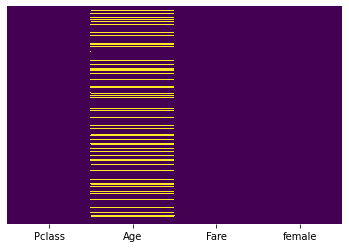

In [56]:
import seaborn as sns
sns.heatmap(inputs.isna(),cbar=False,yticklabels=False,cmap='viridis')

In [57]:
inputs.isna().any()

Pclass    False
Age        True
Fare      False
female    False
dtype: bool

In [58]:
inputs.isna().sum()

Pclass      0
Age       177
Fare        0
female      0
dtype: int64

In [59]:
#inputs.Age[:10]
inputs.Age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [60]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [61]:
inputs.isna().sum()

Pclass    0
Age       0
Fare      0
female    0
dtype: int64

Now no na value for age column 

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [63]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [64]:
model.fit(X_train,y_train)

GaussianNB()

In [65]:
model.score(X_test,y_test)

0.7835820895522388

In [66]:
X_test.head()

,Pclass,Age,Fare,female
328,3,31.0,20.5250,1
105,3,28.0,7.8958,0
173,3,21.0,7.9250,0
102,1,21.0,77.2875,0
327,2,36.0,13.0000,1


In [67]:
y_test.head()

328    1
105    0
173    0
102    0
327    1
Name: Survived, dtype: int64

In [68]:
model.predict_proba(X_test[:10])

array([[0.55372396, 0.44627604],
       [0.96714862, 0.03285138],
       [0.96240143, 0.03759857],
       [0.40177657, 0.59822343],
       [0.3604102 , 0.6395898 ],
       [0.54700278, 0.45299722],
       [0.19793444, 0.80206556],
       [0.96402259, 0.03597741],
       [0.925108  , 0.074892  ],
       [0.92173371, 0.07826629]])

In [69]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_predicted)
confusion_matrix

array([[139,  11],
       [ 47,  71]], dtype=int64)

Text(69.0, 0.5, 'Truth')

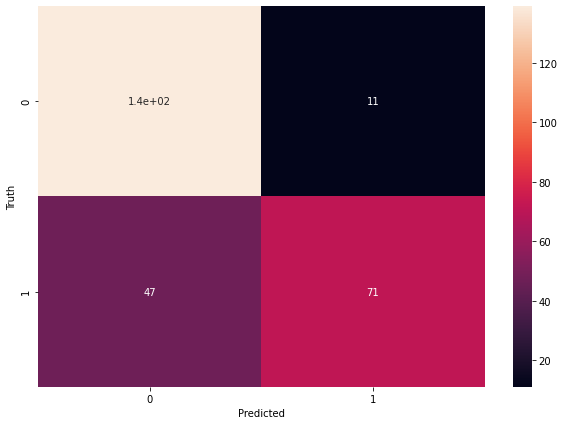

In [70]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Calculate the score using cross validation

In [71]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(GaussianNB(),X_train, y_train, cv=5)

In [72]:
import numpy as np
np.average(scores)

0.772025806451613